# Step Function Example

In [1]:
import matplotlib.pyplot as plt

from mintalib.samples import sample_prices
from mintalib.indicators import SMA, EMA, EVAL, STEP

plt.rc("figure", figsize=(12, 9))

In [2]:
prices = sample_prices()

prices = prices.assign(
    sma = SMA(50),
    pos = EVAL("close > sma"),
    step = STEP(0.1, item="pos"),
)

prices


,open,high,low,close,volume,sma,pos,step
date,,,,,,,,
1980-12-12,0.098943,0.099373,0.098943,0.098943,469033600,NaN,0.0,NaN
1980-12-15,0.094211,0.094211,0.093781,0.093781,175884800,NaN,0.0,0.0
1980-12-16,0.087328,0.087328,0.086898,0.086898,105728000,NaN,0.0,0.0
1980-12-17,0.089049,0.089479,0.089049,0.089049,86441600,NaN,0.0,0.0
1980-12-18,0.091630,0.092061,0.091630,0.091630,73449600,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-10-15,233.610001,237.490005,232.369995,233.850006,64751400,224.138625,1.0,1.0
2024-10-16,231.600006,232.119995,229.839996,231.779999,34082200,224.634417,1.0,1.0
2024-10-17,233.429993,233.850006,230.520004,232.149994,32993800,225.085868,1.0,1.0


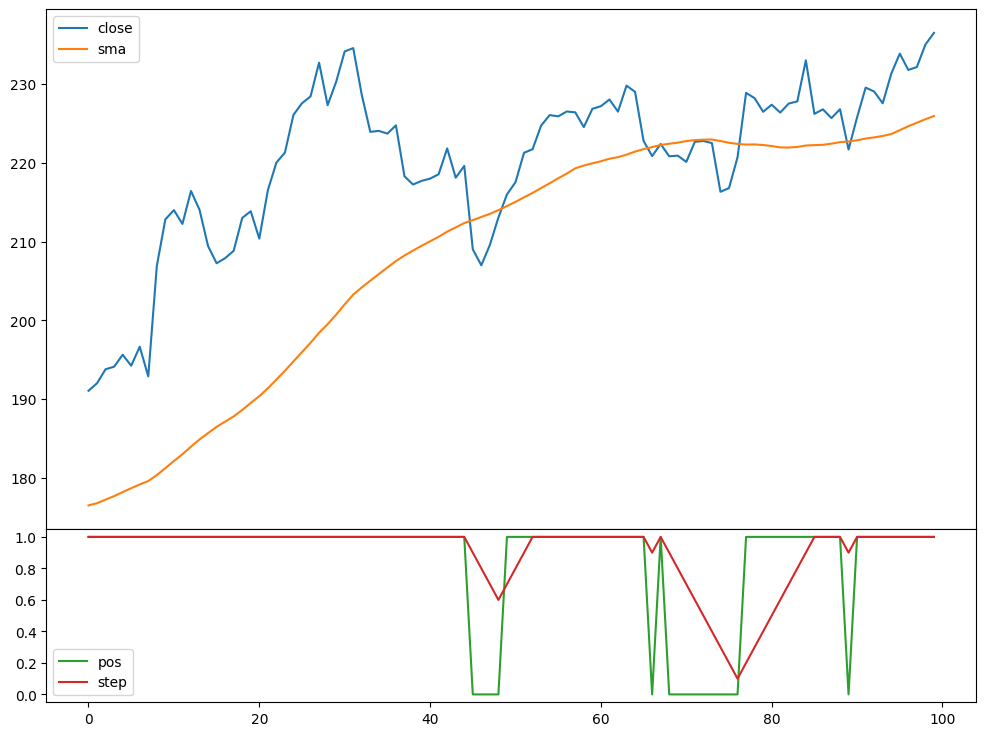

In [3]:
axes = prices.tail(100).plot(
    y=["close", "sma", "pos", "step"],
    subplots=[["close", "sma" ], ["pos", "step"]],
    use_index=False,    
)

ax = axes[-1]

gs = ax.get_gridspec()
gs.set_height_ratios([3, 1])
gs.update(hspace=0.0)
